**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

Dataset link: Walmart_data.csv

*   User_ID:	User ID
*   Product_ID:	Product ID
*   Gender:	Sex of User
*   Age:	Age in bins
*   Occupation:	Occupation(Masked)
*   City_Category:	Category of the City (A,B,C)
*   StayInCurrentCityYears:	Number of years stay in current city
*   Marital_Status:	Marital Status
*   ProductCategory:	Product Category (Masked)
*   Purchase:	Purchase Amount


**What good looks like?**



1.   Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
2.   Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
3.   Do some data exploration steps like:
*   Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
*   Inference after computing the average female and male expenses.
*   Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
4.   Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers. The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
5.   Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
6.   Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years. Give recommendations and action items to Walmart.

**Evaluation Criteria**

1.   Defining Problem Statement and Analyzing basic metrics (10 Points)
*   Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
*   Non-Graphical Analysis: Value counts and unique attributes ​
*   Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots
2.   Missing Value & Outlier Detection (10 Points)
3.   Business Insights based on Non- Graphical and Visual Analysis (10 Points)
Comments on the range of attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plot
4.   Answering questions (50 Points)
Are women spending more money per transaction than men? Why or Why not? (10 Points)
Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
Results when the same activity is performed for Married vs Unmarried (10 Points)
Results when the same activity is performed for Age (10 Points)
5.   Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Comments on different variables when generalizing it for Population
6.   Recommendations (10 Points)
Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/sample_data/walmart_data.csv")

In [2]:
df.shape

(550068, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [45]:
print(f"\nUnique values in each column:\n")
for col in df.columns:
  print(f"{col} - {df[col].nunique()}")


Unique values in each column:

User_ID - 5891
Product_ID - 3631
Gender - 2
Age - 7
Occupation - 21
City_Category - 3
Stay_In_Current_City_Years - 5
Marital_Status - 2
Product_Category - 20
Purchase - 18105


In [6]:
df.memory_usage()

,0
Index,132
User_ID,4400544
Product_ID,4400544
Gender,4400544
Age,4400544
Occupation,4400544
City_Category,4400544
Stay_In_Current_City_Years,4400544
Marital_Status,4400544
Product_Category,4400544


In [7]:
# For such a huge dataset, unique values in each column are limited & are categorical in nature expect 'Purchase'
for col in df.columns:
  if col != 'Purchase':
    # Convert to 'category' data type
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [8]:
# Memory usage reduced from 42+ MB to 10 MB after datatype conversion
df.memory_usage()

,0
Index,132
User_ID,1279400
Product_ID,1261320
Gender,550192
Age,550424
Occupation,550792
City_Category,550200
Stay_In_Current_City_Years,550280
Marital_Status,550192
Product_Category,550784


In [46]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [48]:
# Non-graphical analysis: Find distribution of each column using value_counts
for col in df.columns:
  print(f"\n\n{col}")
  print(f"Number of unique values: {df[col].nunique()}")
  print(f"{df[col].value_counts()}")
  print(f"{df[col].value_counts(normalize=True)}")



User_ID
Number of unique values: 5891
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005810       7
1004991       7
1000094       7
1005391       7
1000708       6
Name: count, Length: 5891, dtype: int64
User_ID
1001680    0.001865
1004277    0.001780
1001941    0.001633
1001181    0.001567
1000889    0.001496
             ...   
1005810    0.000013
1004991    0.000013
1000094    0.000013
1005391    0.000013
1000708    0.000011
Name: proportion, Length: 5891, dtype: float64


Product_ID
Number of unique values: 3631
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00077342       1
P00077542       1
P00068342       1
P00074742       1
P00074542       1
Name: count, Length: 3631, dtype: int64
Product_ID
P00265242    0.003418
P00025442    0.002936
P00110742    0.002931
P00112142    0.002840
P00057642    0.002672
               ...   
P00077342    0.000002
P000

In [10]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [11]:
# To get user level info - Group current data by user_id & sum values in 'Purchase' column
df_users = df.groupby('User_ID', as_index=False).agg({
    'Product_ID' : 'count',
    'Gender' : 'first',
    'Age' : 'first',
    'Occupation' : 'first',
    'City_Category' : 'first',
    'Stay_In_Current_City_Years' : 'first',
    'Marital_Status' : 'first',
    'Product_Category' : 'nunique',
    'Purchase' : 'sum'
})

# Rename columns
df_users.rename(columns={'Purchase': 'Total_Purchase', 'Product_ID': 'Product_Count', 'Product_Category' : 'Uniq_Prod_Cat'}, inplace=True)

<ipython-input-11-12c8400bda22>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_users = df.groupby('User_ID', as_index=False).agg({


In [50]:
df_users.info()

# After grouping by user_id, no.of rows = 5891 (from 550,068 rows with product level data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     5891 non-null   category
 1   Product_Count               5891 non-null   int64   
 2   Gender                      5891 non-null   category
 3   Age                         5891 non-null   category
 4   Occupation                  5891 non-null   category
 5   City_Category               5891 non-null   category
 6   Stay_In_Current_City_Years  5891 non-null   category
 7   Marital_Status              5891 non-null   category
 8   Uniq_Prod_Cat               5891 non-null   int64   
 9   Total_Purchase              5891 non-null   int64   
 10  Spend_Range                 5891 non-null   category
 11  Total_Purchase (K)          5891 non-null   int64   
dtypes: category(8), int64(4)
memory usage: 412.8 KB


In [12]:
df_users.head(10)

,User_ID,Product_Count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Uniq_Prod_Cat,Total_Purchase
0,1000001,35,F,0-17,10,A,2,0,11,334093
1,1000002,77,M,55+,16,C,4+,0,6,810472
2,1000003,29,M,26-35,15,A,3,0,6,341635
3,1000004,14,M,46-50,7,B,2,1,2,206468
4,1000005,106,M,26-35,20,A,1,1,12,821001
5,1000006,47,F,51-55,9,A,1,0,10,379930
6,1000007,17,M,36-45,1,B,1,1,4,234668
7,1000008,77,M,26-35,12,C,4+,1,7,796593
8,1000009,58,M,26-35,17,C,0,0,9,594099
9,1000010,223,F,36-45,1,B,4+,1,14,2169510


In [13]:
df_users['Total_Purchase'].describe()

,Total_Purchase
count,5.891000e+03
mean,8.650166e+05
std,9.436445e+05
min,4.668100e+04
25%,2.376780e+05
50%,5.212130e+05
75%,1.119250e+06
max,1.053691e+07


In [51]:
df_male = df_users[df_users['Gender'] == 'M']
df_female = df_users[df_users['Gender'] == 'F']

print(f"Male users count = {df_male.shape[0]}")
print(f"Female users count = {df_female.shape[0]}")
print(f"Total users count = {df_users.shape[0]}")

Male users count = 4225
Female users count = 1666
Total users count = 5891


In [15]:
df_male['Total_Purchase'].describe()

,Total_Purchase
count,4.225000e+03
mean,9.253444e+05
std,9.858301e+05
min,4.928800e+04
25%,2.585890e+05
50%,5.785400e+05
75%,1.215237e+06
max,1.053691e+07


In [16]:
df_female['Total_Purchase'].describe()

,Total_Purchase
count,1.666000e+03
mean,7.120244e+05
std,8.073707e+05
min,4.668100e+04
25%,2.026548e+05
50%,4.072630e+05
75%,8.737720e+05
max,6.187094e+06


In [56]:
# Difference in average spend by male & female
diff_mean_spend = df_male['Total_Purchase'].mean() - df_female['Total_Purchase'].mean()
print(f"Difference in average spend by male & female = {diff_mean_spend:,.0f}")

diff_median_spend = df_male['Total_Purchase'].median() - df_female['Total_Purchase'].median()
print(f"Difference in median spend by male & female = {diff_median_spend:,.0f}")

Difference in average spend by male & female = 213,320
Difference in median spend by male & female = 171,277


<Figure size 600x600 with 0 Axes>

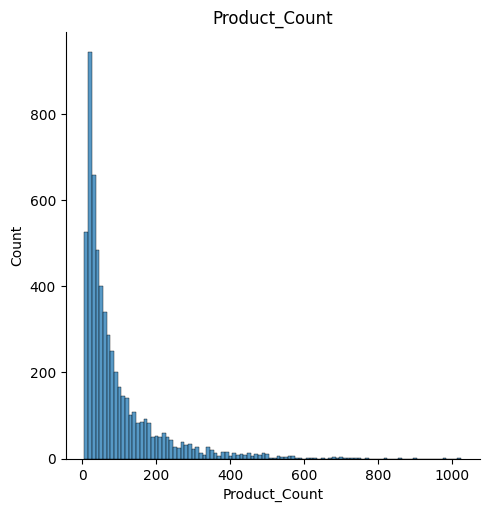

<Figure size 600x600 with 0 Axes>

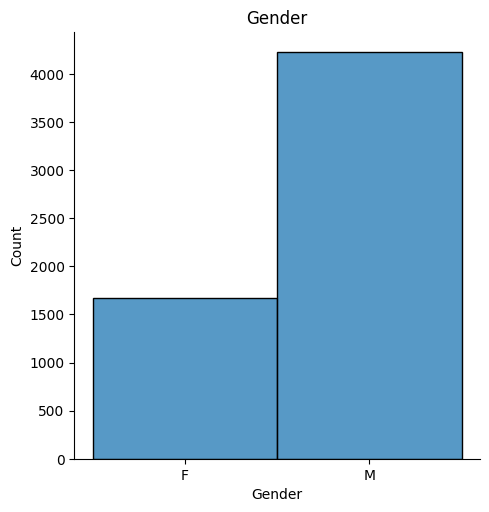

<Figure size 600x600 with 0 Axes>

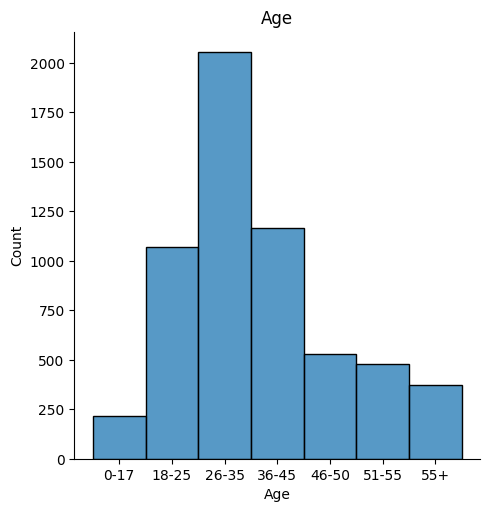

<Figure size 600x600 with 0 Axes>

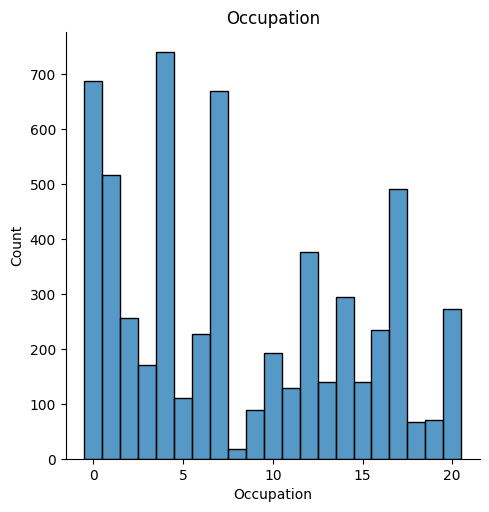

<Figure size 600x600 with 0 Axes>

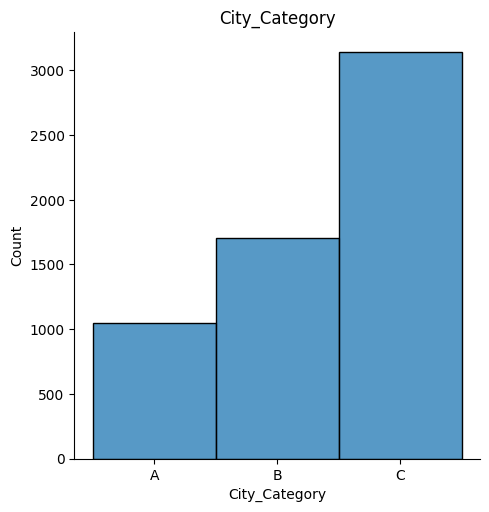

<Figure size 600x600 with 0 Axes>

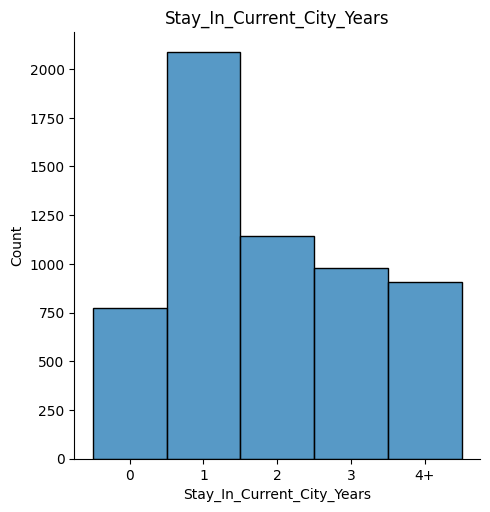

<Figure size 600x600 with 0 Axes>

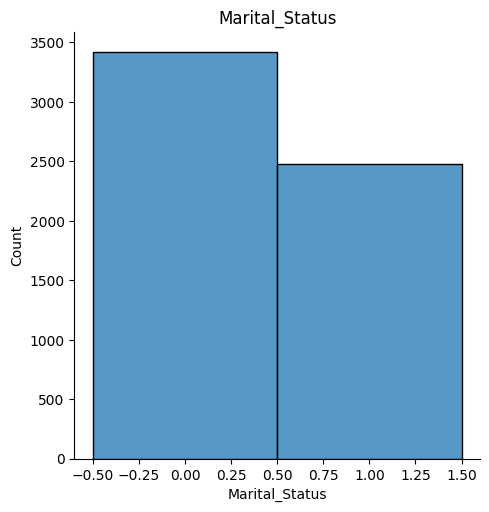

<Figure size 600x600 with 0 Axes>

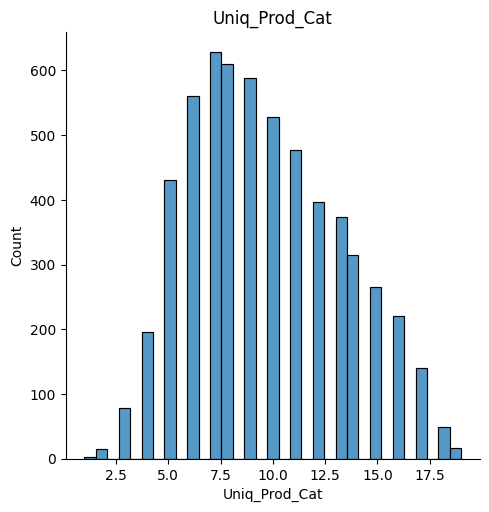

<Figure size 600x600 with 0 Axes>

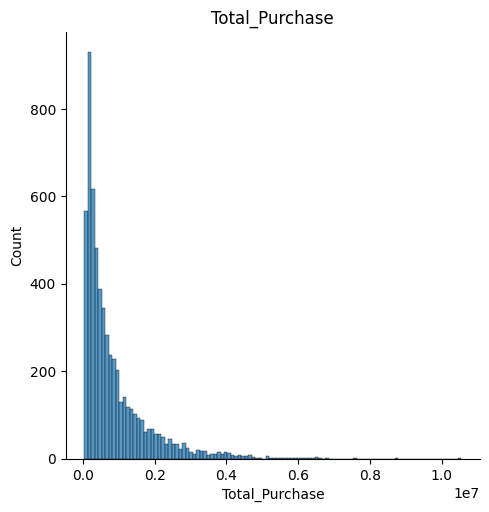

<Figure size 600x600 with 0 Axes>

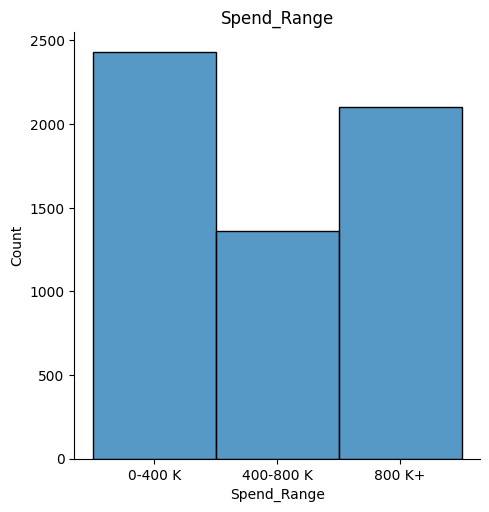

<Figure size 600x600 with 0 Axes>

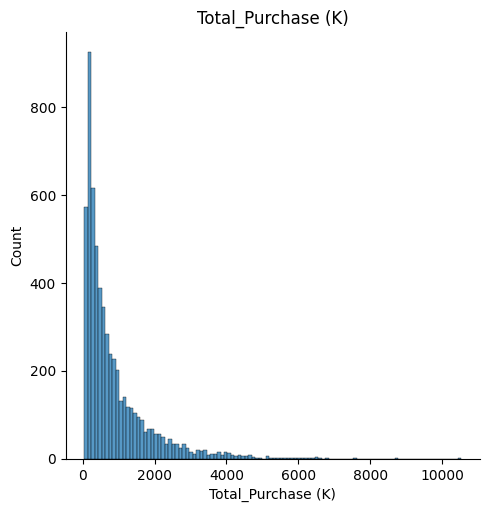

In [60]:
# Graphical analysis - Univariate & Bi-variate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Uni-variate plots
for col in df_users.columns:
  if col != 'User_ID':
    plt.figure(figsize=(6,6))
    sns.displot(x=col, data=df_users)
    plt.title(col)
    plt.show()

In [68]:
df_users['Total_Purchase (K)'] = (df_users['Total_Purchase'] / 1000).round(0).astype(int)
df_users.head()

,User_ID,Product_Count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Uniq_Prod_Cat,Total_Purchase,Spend_Range,Total_Purchase (K)
0,1000001,35,F,0-17,10,A,2,0,11,334093,0-400 K,334
1,1000002,77,M,55+,16,C,4+,0,6,810472,800 K+,810
2,1000003,29,M,26-35,15,A,3,0,6,341635,0-400 K,342
3,1000004,14,M,46-50,7,B,2,1,2,206468,0-400 K,206
4,1000005,106,M,26-35,20,A,1,1,12,821001,800 K+,821


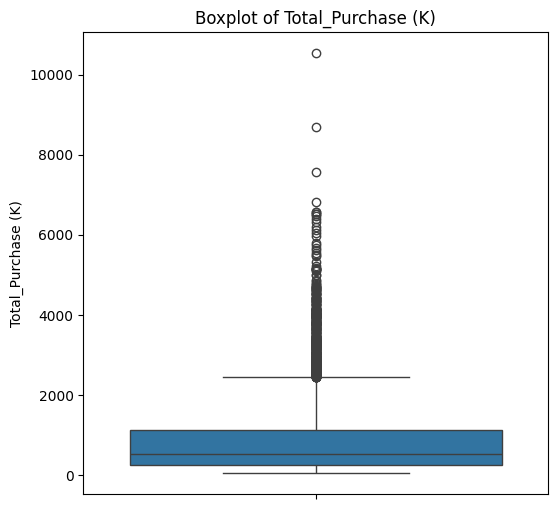

In [69]:
# Create box plot for 'Total_Purchase' column
plt.figure(figsize=(6,6))
sns.boxplot(y=df_users['Total_Purchase (K)'])
plt.title('Boxplot of Total_Purchase (K)')
plt.show()

In [84]:
# Find number of outliers in 'Total_Purchase (K)' column values using IQR
data = df_users['Total_Purchase (K)']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Number of outliers in 'Total_Purchase (K)' column: {outliers.shape[0]}")

# Find % of outliers against total number of values in data
total_users = len(data)
outliers_pct = (len(outliers) / total_users) * 100
print(f"Total number of users: {total_users}")
print(f"Number of outliers: {outliers_pct:.0f}%")

# Find distribution of spend among the outliers
outliers.describe()

# Find % of spend by these outliers
print(f"Total spend by outliers: {(outliers.sum() / df_users['Total_Purchase'].sum()) * 100:.2f}%")

Number of outliers in 'Total_Purchase (K)' column: 409
Total number of users: 5891
Number of outliers: 7%
Total spend by outliers: 0.03%


In [85]:
# 7% outliers with very high spend are 'Power / Premium Users' - they can be analyzed & promoted separately

# Make a dataframe removing the outliers from df_users dataframe
df_users_copy = df_users.copy()
df_users_copy = df_users_copy[~((df_users_copy['Total_Purchase (K)'] < lower_bound) | (df_users_copy['Total_Purchase (K)'] > upper_bound))]
df_users_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5482 entries, 0 to 5890
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     5482 non-null   category
 1   Product_Count               5482 non-null   int64   
 2   Gender                      5482 non-null   category
 3   Age                         5482 non-null   category
 4   Occupation                  5482 non-null   category
 5   City_Category               5482 non-null   category
 6   Stay_In_Current_City_Years  5482 non-null   category
 7   Marital_Status              5482 non-null   category
 8   Uniq_Prod_Cat               5482 non-null   int64   
 9   Total_Purchase              5482 non-null   int64   
 10  Spend_Range                 5482 non-null   category
 11  Total_Purchase (K)          5482 non-null   int64   
dtypes: category(8), int64(4)
memory usage: 439.1 KB


In [86]:
df_users_copy['Total_Purchase (K)'].describe()

,Total_Purchase (K)
count,5482.000000
mean,667.784020
std,563.742106
min,47.000000
25%,227.000000
50%,473.000000
75%,938.750000
max,2440.000000


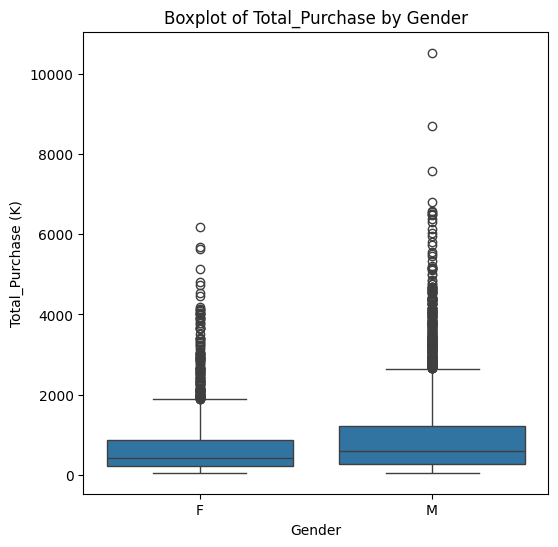

In [89]:
# Create box plot for 'Total_Purchase' column in male & female users
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender', y='Total_Purchase (K)', data=df_users)
plt.title('Boxplot of Total_Purchase by Gender')
plt.show()

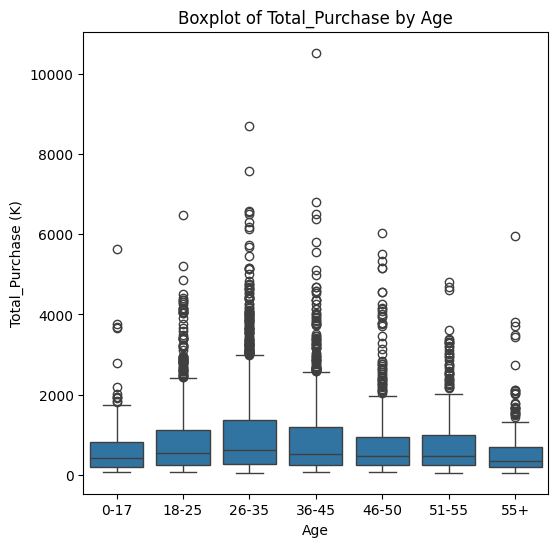

In [90]:
# Create box plot for 'Total_Purchase' column in diff age groups
plt.figure(figsize=(6,6))
sns.boxplot(x='Age', y='Total_Purchase (K)', data=df_users)
plt.title('Boxplot of Total_Purchase by Age')
plt.show()

In [18]:
df_users.head()

,User_ID,Product_Count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Uniq_Prod_Cat,Total_Purchase
0,1000001,35,F,0-17,10,A,2,0,11,334093
1,1000002,77,M,55+,16,C,4+,0,6,810472
2,1000003,29,M,26-35,15,A,3,0,6,341635
3,1000004,14,M,46-50,7,B,2,1,2,206468
4,1000005,106,M,26-35,20,A,1,1,12,821001


<Axes: >

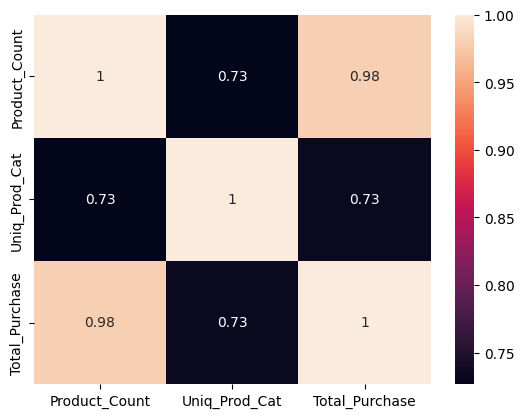

In [19]:
# Correlation - heatmap
num_df = df_users.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True)

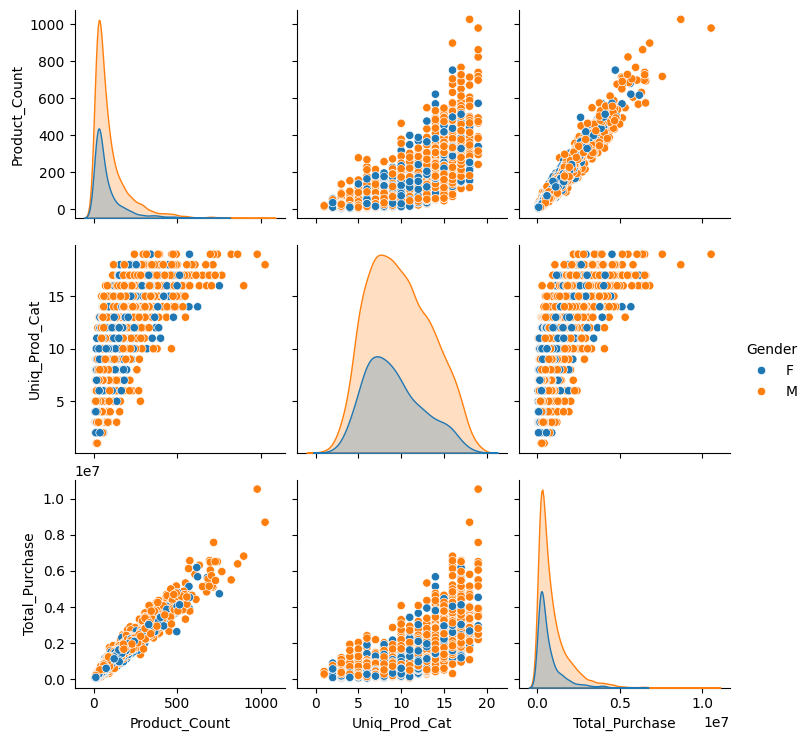

In [20]:
# Correlation - pairplot
plt.show()
sns.pairplot(df_users, hue='Gender')

In [21]:
# Bi-variate analysis - Spend vs Demographics (Age, Gender, Occupation, Marital status, City_category, Stay in current city)


In [22]:
num_cols = []
cat_cols = []

for col in df_users.columns:
  if df_users[col].dtype == 'int64' or df_users[col].dtype == 'float64' or col == 'User_ID':
    num_cols.append(col)
  else:
    cat_cols.append(col)

In [23]:
df_users['Total_Purchase'].describe()

,Total_Purchase
count,5.891000e+03
mean,8.650166e+05
std,9.436445e+05
min,4.668100e+04
25%,2.376780e+05
50%,5.212130e+05
75%,1.119250e+06
max,1.053691e+07


In [24]:
# Bin Total_Purchase into bins
df_users['Spend_Range'] = pd.cut(df_users['Total_Purchase'], bins=[0, 400000, 800000, float('inf')], labels=['0-400 K', '400-800 K', '800 K+'])
df_users['Spend_Range'].value_counts(normalize=True)

,proportion
Spend_Range,
0-400 K,0.412324
800 K+,0.356985
400-800 K,0.230691


In [25]:
# Spend profiling
for col in cat_cols:
  print(f"\nConditional Probability: Given Spend X, what is prob of {col}\n")
  print(f"{pd.crosstab(df_users['Spend_Range'], df_users[col], normalize='index') * 100}")


Conditional Probability: Given Spend X, what is prob of Gender

Gender               F          M
Spend_Range                      
0-400 K      33.923425  66.076575
400-800 K    27.814570  72.185430
800 K+       22.063718  77.936282

Conditional Probability: Given Spend X, what is prob of Age

Age              0-17      18-25      26-35      36-45     46-50     51-55  \
Spend_Range                                                                  
0-400 K      4.405105  17.620420  30.959242  19.843557  9.592425  8.974887   
400-800 K    4.120677  19.426049  32.671082  19.646799  9.639441  8.167770   
800 K+       2.615311  17.926771  40.751308  19.876367  7.941037  7.227770   

Age               55+  
Spend_Range            
0-400 K      8.604364  
400-800 K    6.328182  
800 K+       3.661436  

Conditional Probability: Given Spend X, what is prob of Occupation

Occupation           0         1         2         3          4         5  \
Spend_Range                                   

In [26]:
# Targeting customers (Customer profiling)
for col in cat_cols:
  print(f"\nConditional Probability: Given {col}, what is prob of Spend X\n")
  print(f"{pd.crosstab(df_users[col], df_users['Spend_Range'], normalize='index') * 100}")


Conditional Probability: Given Gender, what is prob of Spend X

Spend_Range    0-400 K  400-800 K     800 K+
Gender                                      
F            49.459784  22.689076  27.851140
M            37.988166  23.218935  38.792899

Conditional Probability: Given Age, what is prob of Spend X

Spend_Range    0-400 K  400-800 K     800 K+
Age                                         
0-17         49.082569  25.688073  25.229358
18-25        40.037418  24.695978  35.266604
26-35        36.629323  21.626887  41.743790
36-45        41.302485  22.879177  35.818338
46-50        43.879473  24.670433  31.450094
51-55        45.322245  23.076923  31.600832
55+          56.182796  23.118280  20.698925

Conditional Probability: Given Occupation, what is prob of Spend X

Spend_Range    0-400 K  400-800 K     800 K+
Occupation                                  
0            40.261628  22.529070  37.209302
1            43.133462  22.050290  34.816248
2            38.281250  22.265625  39.4

In [27]:
df_users.head(10)

,User_ID,Product_Count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Uniq_Prod_Cat,Total_Purchase,Spend_Range
0,1000001,35,F,0-17,10,A,2,0,11,334093,0-400 K
1,1000002,77,M,55+,16,C,4+,0,6,810472,800 K+
2,1000003,29,M,26-35,15,A,3,0,6,341635,0-400 K
3,1000004,14,M,46-50,7,B,2,1,2,206468,0-400 K
4,1000005,106,M,26-35,20,A,1,1,12,821001,800 K+
5,1000006,47,F,51-55,9,A,1,0,10,379930,0-400 K
6,1000007,17,M,36-45,1,B,1,1,4,234668,0-400 K
7,1000008,77,M,26-35,12,C,4+,1,7,796593,400-800 K
8,1000009,58,M,26-35,17,C,0,0,9,594099,400-800 K
9,1000010,223,F,36-45,1,B,4+,1,14,2169510,800 K+


In [28]:
# Find % of total purchase from male & female users
sum_totat_purchase = df_users['Total_Purchase'].sum()
df_users.groupby('Gender').agg({'Total_Purchase':'sum'}) / sum_totat_purchase * 100

<ipython-input-28-26cf1e2b5aff>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_users.groupby('Gender').agg({'Total_Purchase':'sum'}) / sum_totat_purchase * 100


,Total_Purchase
Gender,
F,23.278576
M,76.721424


In [29]:
# Within Male Gender, find % of total_purchase by age
df_male_users = df_users[df_users['Gender'] == 'M']
df_male_users.groupby('Age').agg({'Total_Purchase':'sum'}) / df_male_users['Total_Purchase'].sum() * 100

<ipython-input-29-875a06fbc6de>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_male_users.groupby('Age').agg({'Total_Purchase':'sum'}) / df_male_users['Total_Purchase'].sum() * 100


,Total_Purchase
Age,
0-17,2.366679
18-25,18.118898
26-35,40.638491
36-45,20.031075
46-50,7.779264
51-55,7.101367
55+,3.964226


In [30]:
# Within Male, within Age, find % of total_purchase by 'occupation'
df_male_users.groupby(['Age', 'Occupation'])['Total_Purchase'].sum() / df_male_users.groupby('Age')['Total_Purchase'].sum()

<ipython-input-30-35d68955b192>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_male_users.groupby(['Age', 'Occupation'])['Total_Purchase'].sum() / df_male_users.groupby('Age')['Total_Purchase'].sum()


Age   Occupation
0-17  0             0.141014
      1             0.017937
      2             0.005420
      3             0.000000
      4             0.011519
                      ...   
55+   16            0.093858
      17            0.087075
      18            0.006118
      19            0.011413
      20            0.053564
Name: Total_Purchase, Length: 147, dtype: float64

In [31]:
result = df_male_users.groupby(['Age', 'Occupation'])['Total_Purchase'].sum().reset_index()

total_by_age = df_male_users.groupby('Age')['Total_Purchase'].sum().reset_index(name='Total_Purchase_By_Age')

result = result.merge(total_by_age, on='Age')
result['Purchase_%'] = result['Total_Purchase'] / result['Total_Purchase_By_Age']
result[result['Age']=='26-35'].head(64)

<ipython-input-31-b839a4a88f2a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df_male_users.groupby(['Age', 'Occupation'])['Total_Purchase'].sum().reset_index()
<ipython-input-31-b839a4a88f2a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age = df_male_users.groupby('Age')['Total_Purchase'].sum().reset_index(name='Total_Purchase_By_Age')


,Age,Occupation,Total_Purchase,Total_Purchase_By_Age,Purchase_%
42,26-35,0,239798628,1588794345,0.150931
43,26-35,1,108027463,1588794345,0.067993
44,26-35,2,94118634,1588794345,0.059239
45,26-35,3,37398894,1588794345,0.023539
46,26-35,4,160493738,1588794345,0.101016
47,26-35,5,50018598,1588794345,0.031482
48,26-35,6,41943485,1588794345,0.026400
49,26-35,7,176812314,1588794345,0.111287
50,26-35,8,3973559,1588794345,0.002501
51,26-35,9,562855,1588794345,0.000354


In [32]:
# Within Female Gender, find % of total_purchase by age
df_female_users = df_users[df_users['Gender'] == 'F']
df_female_users.groupby('Age').agg({'Total_Purchase':'sum'}) / df_female_users['Total_Purchase'].sum() * 100

<ipython-input-32-14678745c024>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_female_users.groupby('Age').agg({'Total_Purchase':'sum'}) / df_female_users['Total_Purchase'].sum() * 100


,Total_Purchase
Age,
0-17,3.573159
18-25,17.321715
26-35,37.343116
36-45,20.522025
46-50,9.838447
51-55,7.542028
55+,3.859510


In [33]:
df_users['Total_Purchase (K)'] = (df_users['Total_Purchase'] / 1000).round(0).astype(int)
df_users.head()

,User_ID,Product_Count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Uniq_Prod_Cat,Total_Purchase,Spend_Range,Total_Purchase (K)
0,1000001,35,F,0-17,10,A,2,0,11,334093,0-400 K,334
1,1000002,77,M,55+,16,C,4+,0,6,810472,800 K+,810
2,1000003,29,M,26-35,15,A,3,0,6,341635,0-400 K,342
3,1000004,14,M,46-50,7,B,2,1,2,206468,0-400 K,206
4,1000005,106,M,26-35,20,A,1,1,12,821001,800 K+,821


In [34]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# STEP 1: Filter female customers
df_female = df_users[df_users['Gender'] == 'F']

# STEP 2: Compute sample statistics
sample = df_female['Total_Purchase (K)']
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)   # Sample standard deviation
n = len(sample)                   # Sample size

# STEP 3: Choose confidence level (can change to 0.90, 0.99, etc.)
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level)/2)

# STEP 4: Calculate margin of error
margin_of_error = z_score * (sample_std / np.sqrt(n))

# STEP 5: Compute confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# STEP 6: Print results
print(f"\n\nFemale Users - Sample stats:\n")
print(f"Sample Size (n): {n}")
print(f"Sample Mean of Total_Purchase (K): {sample_mean:.0f}K")
print(f"Margin of error: {margin_of_error:.0f}K")
print(f"{int(confidence_level*100)}% Confidence Interval: ({ci_lower:.0f}K, {ci_upper:.0f}K)")




Female Users - Sample stats:

Sample Size (n): 1666
Sample Mean of Total_Purchase (K): 712K
Margin of error: 39K
95% Confidence Interval: (673K, 751K)


In [35]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# STEP 1: Filter male customers
df_male = df_users[df_users['Gender'] == 'M']

# STEP 2: Compute sample statistics
sample = df_male['Total_Purchase (K)']
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)   # Sample standard deviation
n = len(sample)                   # Sample size

# STEP 3: Choose confidence level (can change to 0.90, 0.99, etc.)
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level)/2)

# STEP 4: Calculate margin of error
margin_of_error = z_score * (sample_std / np.sqrt(n))

# STEP 5: Compute confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# STEP 6: Print results
print(f"\n\nMale Users - Sample stats:\n")
print(f"Sample Size (n): {n}")
print(f"Sample Mean of Total_Purchase (K): {sample_mean:.0f}K")
print(f"Margin of error: {margin_of_error:.0f}K")
print(f"{int(confidence_level*100)}% Confidence Interval: ({ci_lower:.0f}K, {ci_upper:.0f}K)")




Male Users - Sample stats:

Sample Size (n): 4225
Sample Mean of Total_Purchase (K): 925K
Margin of error: 30K
95% Confidence Interval: (896K, 955K)


In [36]:
print(f"Male users count = {df_male.shape[0]}")
print(f"Female users count = {df_female.shape[0]}")
print(f"Total users count = {df_users.shape[0]}")

Male users count = 4225
Female users count = 1666
Total users count = 5891


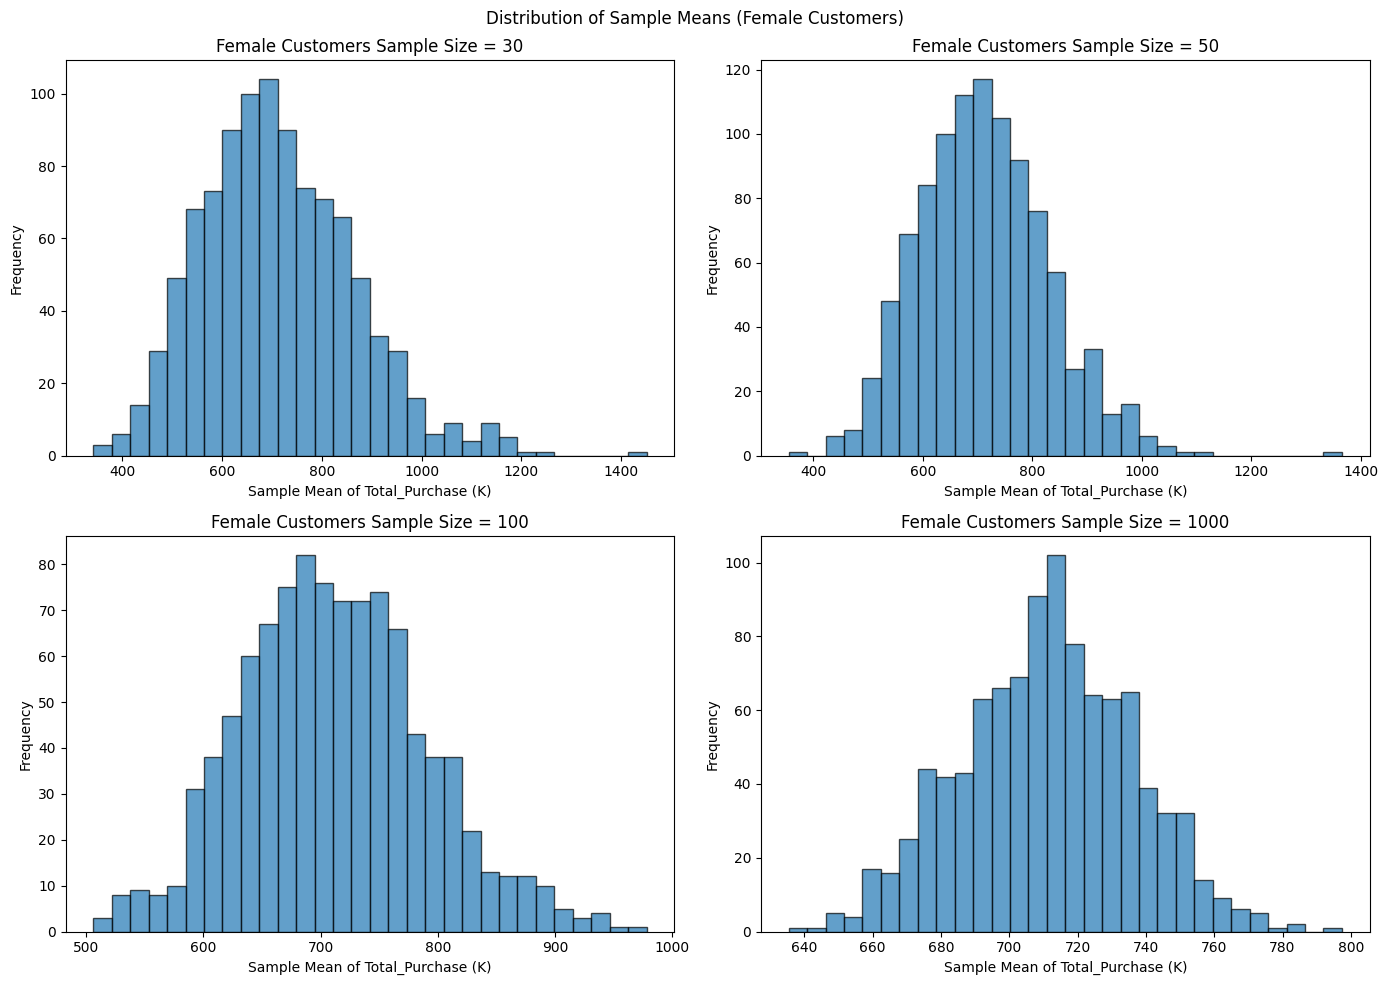

In [37]:
import matplotlib.pyplot as plt

sample_sizes = [30, 50, 100, 1000]
num_samples = 1000

female_spending = df_female['Total_Purchase (K)'].values
male_spending = df_male['Total_Purchase (K)'].values

plt.figure(figsize=(14,10))

for i,n in enumerate(sample_sizes, 1):
  sample_means = []
  for _ in range(num_samples):
    sample = np.random.choice(female_spending, size=n, replace=True)
    sample_means.append(sample.mean())

  plt.subplot(2,2,i)
  plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
  plt.title(f'Female Customers Sample Size = {n}')
  plt.xlabel('Sample Mean of Total_Purchase (K)')
  plt.ylabel('Frequency')

plt.suptitle('Distribution of Sample Means (Female Customers)')
plt.tight_layout()
plt.show()



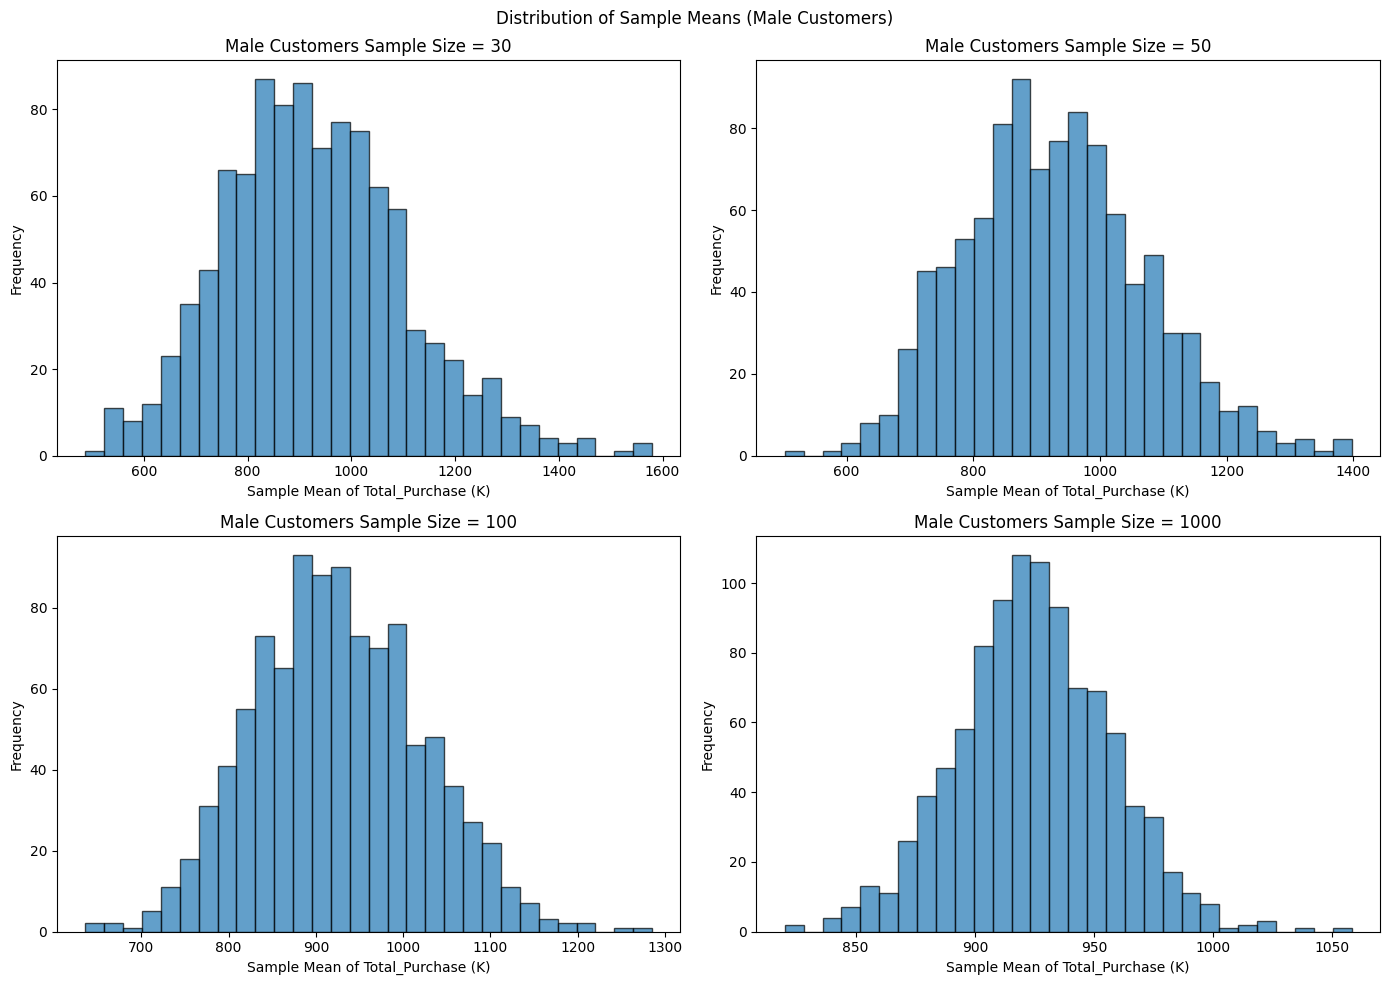

In [38]:
import matplotlib.pyplot as plt

sample_sizes = [30, 50, 100, 1000]
num_samples = 1000

male_spending = df_male['Total_Purchase (K)'].values

plt.figure(figsize=(14,10))

for i,n in enumerate(sample_sizes, 1):
  sample_means = []
  for _ in range(num_samples):
    sample = np.random.choice(male_spending, size=n, replace=True)
    sample_means.append(sample.mean())

  plt.subplot(2,2,i)
  plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
  plt.title(f'Male Customers Sample Size = {n}')
  plt.xlabel('Sample Mean of Total_Purchase (K)')
  plt.ylabel('Frequency')

plt.suptitle('Distribution of Sample Means (Male Customers)')
plt.tight_layout()
plt.show()

In [39]:
df_male['Total_Purchase (K)'].describe()

,Total_Purchase (K)
count,4225.000000
mean,925.345562
std,985.834628
min,49.000000
25%,259.000000
50%,579.000000
75%,1215.000000
max,10537.000000


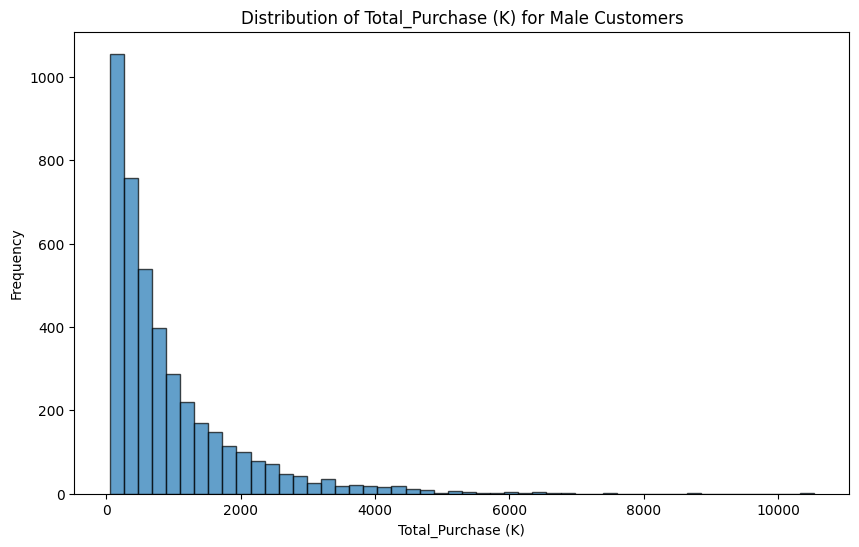

In [40]:
# Plot histogram of all male users 'Total_Purchase (K)'
plt.figure(figsize=(10,6))
plt.hist(df_male['Total_Purchase (K)'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total_Purchase (K) for Male Customers')
plt.xlabel('Total_Purchase (K)')
plt.ylabel('Frequency')
plt.show()

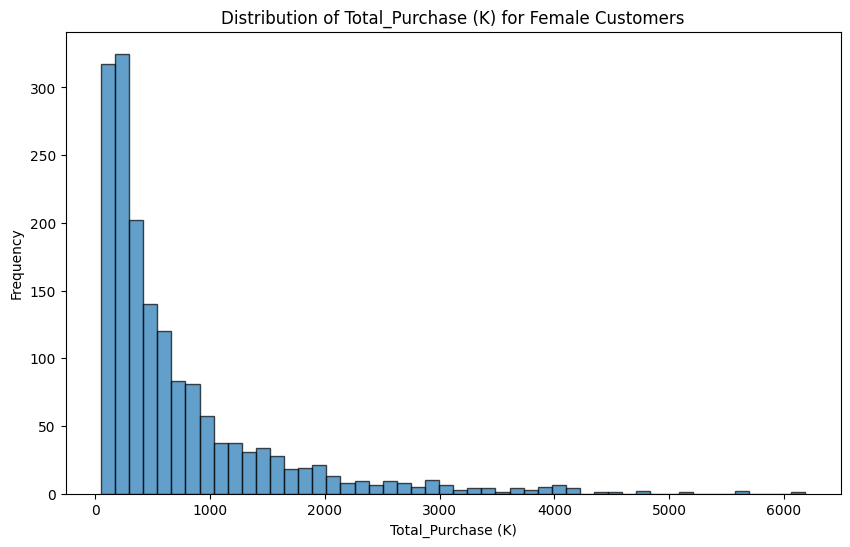

In [41]:
# Plot histogram of all female users 'Total_Purchase (K)'
plt.figure(figsize=(10,6))
plt.hist(df_female['Total_Purchase (K)'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total_Purchase (K) for Female Customers')
plt.xlabel('Total_Purchase (K)')
plt.ylabel('Frequency')
plt.show()

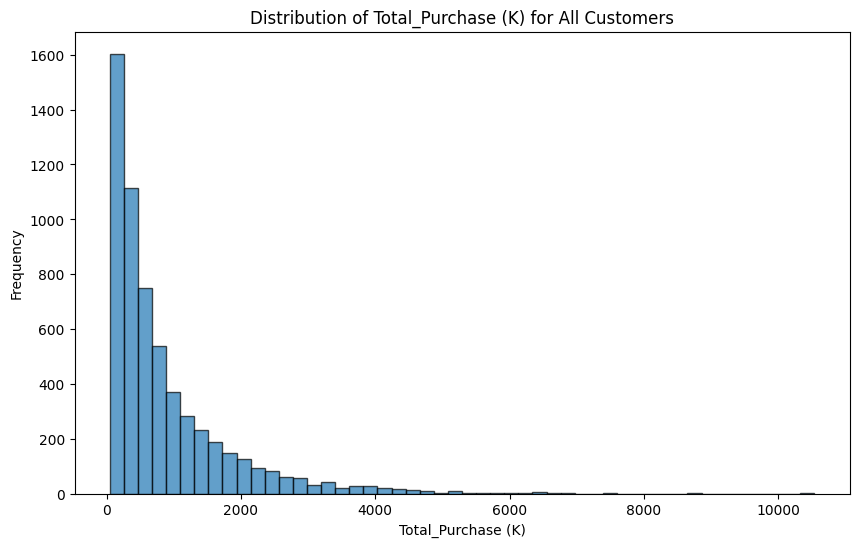

In [42]:
# Plot histogram of all users 'Total_Purchase (K)'
plt.figure(figsize=(10,6))
plt.hist(df_users['Total_Purchase (K)'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total_Purchase (K) for All Customers')
plt.xlabel('Total_Purchase (K)')
plt.ylabel('Frequency')
plt.show()

In [93]:
# Random sampling, Sample size, Sample mean, Confidence level, Margin of error, Confidence interval
# 3 variables - Sample size, No.of samples, Confidence level

population_mean = df_male['Total_Purchase (K)'].mean()

num_samples = [100]
sample_size = [30, 100, 400, 1000]
confidence_level = [0.9, 0.95, 0.99]

# Store CI widths
ci_widths_by_confidence = {cl: [] for cl in confidence_level}

# Compute confidence interval
for n in sample_size:
    #print(f"\n\nSample Size (n): {n}")

    for i in range(len(num_samples)):
      print(f"\n\nActual Population Mean: {population_mean:.0f}K")
      print(f"Sample Size (n): {n}, No.of Samples: {num_samples[i]}")

      sample_means = []
      for _ in range(num_samples[i]):
        sample = np.random.choice(df_male['Total_Purchase (K)'], size=n, replace=True)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)

      mean_of_means = np.mean(sample_means)
      std_error = np.std(sample_means, ddof=1) / np.sqrt(n)

      # Print results
      print(f"Mean of {num_samples[i]} Sample Means of Total_Purchase (K): {mean_of_means:.0f}K")

      for cl in confidence_level:
          z_score = norm.ppf(1 - (1 - cl)/2)
          margin_of_error = z_score * std_error
          ci_lower = mean_of_means - margin_of_error
          ci_upper = mean_of_means + margin_of_error
          ci_width = 2 * margin_of_error

          ci_widths_by_confidence[cl].append(ci_width)

          print(f"\nConfidence level: {cl}")
          print(f"Margin of error: ±{margin_of_error:.2f}K")
          print(f"{int(cl*100)}% Confidence Interval: ({ci_lower:.0f}K, {ci_upper:.0f}K)\n")




Actual Population Mean: 925K
Sample Size (n): 30, No.of Samples: 100
Mean of 100 Sample Means of Total_Purchase (K): 934K

Confidence level: 0.9
Margin of error: ±53.67K
90% Confidence Interval: (880K, 987K)


Confidence level: 0.95
Margin of error: ±63.95K
95% Confidence Interval: (870K, 998K)


Confidence level: 0.99
Margin of error: ±84.04K
99% Confidence Interval: (850K, 1018K)



Actual Population Mean: 925K
Sample Size (n): 100, No.of Samples: 100
Mean of 100 Sample Means of Total_Purchase (K): 919K

Confidence level: 0.9
Margin of error: ±16.31K
90% Confidence Interval: (903K, 936K)


Confidence level: 0.95
Margin of error: ±19.44K
95% Confidence Interval: (900K, 939K)


Confidence level: 0.99
Margin of error: ±25.55K
99% Confidence Interval: (894K, 945K)



Actual Population Mean: 925K
Sample Size (n): 400, No.of Samples: 100
Mean of 100 Sample Means of Total_Purchase (K): 935K

Confidence level: 0.9
Margin of error: ±3.58K
90% Confidence Interval: (931K, 939K)


Confidence l

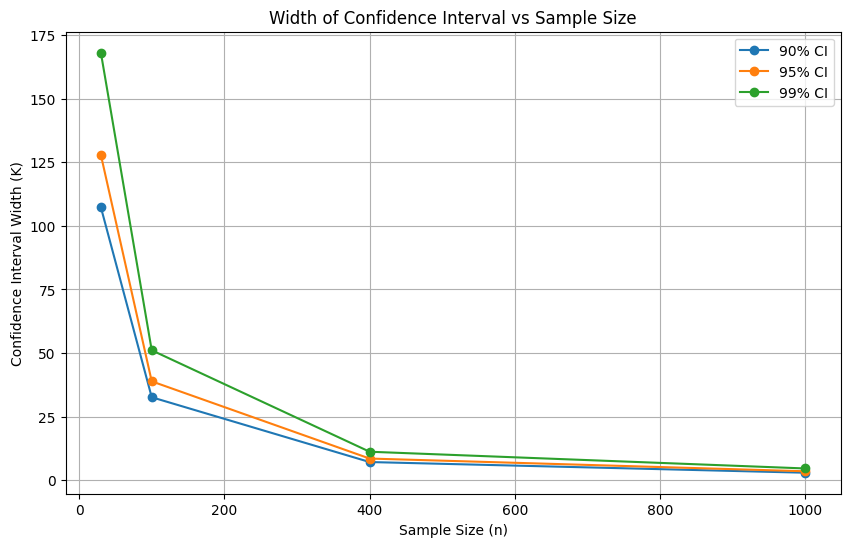

In [94]:
# Plot
plt.figure(figsize=(10, 6))
for cl in confidence_level:
    plt.plot(sample_size, ci_widths_by_confidence[cl], marker='o', label=f'{int(cl*100)}% CI')

plt.title('Width of Confidence Interval vs Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel('Confidence Interval Width (K)')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
from scipy.stats import norm
import numpy as np

# 95% confidence level
confidence = 0.95
z = norm.ppf(1 - (1 - confidence) / 2)

# FEMALE
female_spending = df_users[df_users['Gender'] == 'F']['Total_Purchase (K)']
f_mean = np.mean(female_spending)
f_std = np.std(female_spending, ddof=1)
f_n = len(female_spending)
f_margin_error = z * (f_std / np.sqrt(f_n))
f_ci = (f_mean - f_margin_error, f_mean + f_margin_error)

# MALE
male_spending = df_users[df_users['Gender'] == 'M']['Total_Purchase (K)']
m_mean = np.mean(male_spending)
m_std = np.std(male_spending, ddof=1)
m_n = len(male_spending)
m_margin_error = z * (m_std / np.sqrt(m_n))
m_ci = (m_mean - m_margin_error, m_mean + m_margin_error)

# Print results
print(f"Female Mean: {f_mean:.0f}K, 95% CI: ({f_ci[0]:.0f}K, {f_ci[1]:.0f}K)")
print(f"Male Mean:   {m_mean:.0f}K, 95% CI: ({m_ci[0]:.0f}K, {m_ci[1]:.0f}K)")

# Check overlap
overlap = not (f_ci[1] < m_ci[0] or m_ci[1] < f_ci[0])
print("Do the confidence intervals overlap?", overlap)


Female Mean: 712K, 95% CI: (673K, 751K)
Male Mean:   925K, 95% CI: (896K, 955K)
Do the confidence intervals overlap? False


In [ ]:
# Difference in average spending between male and female customers is statistically significant at the 95% confidence level
# Male users (925K) spend significantly more than female users (712K).
# Promotion - Male: Target with high basket price items - premium products & product bundles
# Promotion - Female: Target with loyalty programs (buy more, save more offers) & upsell offers to increase cart value

In [97]:
df_users.head()

,User_ID,Product_Count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Uniq_Prod_Cat,Total_Purchase,Spend_Range,Total_Purchase (K)
0,1000001,35,F,0-17,10,A,2,0,11,334093,0-400 K,334
1,1000002,77,M,55+,16,C,4+,0,6,810472,800 K+,810
2,1000003,29,M,26-35,15,A,3,0,6,341635,0-400 K,342
3,1000004,14,M,46-50,7,B,2,1,2,206468,0-400 K,206
4,1000005,106,M,26-35,20,A,1,1,12,821001,800 K+,821


In [99]:
# Confidence interval overlap for - Married vs Single users
from scipy.stats import norm
import numpy as np

# 95% confidence level
confidence = 0.95
z = norm.ppf(1 - (1 - confidence) / 2)

# Unmarried (um)
um_spending = df_users[df_users['Marital_Status'] == 0]['Total_Purchase (K)']
um_mean = np.mean(um_spending)
um_std = np.std(um_spending, ddof=1)
um_n = len(um_spending)
um_margin_error = z * (um_std / np.sqrt(um_n))
um_ci = (um_mean - um_margin_error, um_mean + um_margin_error)

# Married (m)
m_spending = df_users[df_users['Marital_Status'] == 1]['Total_Purchase (K)']
m_mean = np.mean(m_spending)
m_std = np.std(m_spending, ddof=1)
m_n = len(m_spending)
m_margin_error = z * (m_std / np.sqrt(m_n))
m_ci = (m_mean - m_margin_error, m_mean + m_margin_error)

# Print results
print(f"Umarried Mean: {um_mean:.0f}K, 95% CI: ({um_ci[0]:.0f}K, {um_ci[1]:.0f}K)")
print(f"Married Mean:   {m_mean:.0f}K, 95% CI: ({m_ci[0]:.0f}K, {m_ci[1]:.0f}K)")

# Check overlap
overlap = not (um_ci[1] < m_ci[0] or m_ci[1] < um_ci[0])
print("Do the confidence intervals overlap?", overlap)


Umarried Mean: 881K, 95% CI: (849K, 912K)
Married Mean:   844K, 95% CI: (807K, 880K)
Do the confidence intervals overlap? True


In [ ]:
# Confidence intervals of spend by unmarried & married users is overlapping, so their spend is not statistically significant at 95% confidence level
# Use same promotion tactics for both - unmarried & married users

In [100]:
df_users['Age'].value_counts()

,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


In [101]:
# Check for confidence interval overlap for users in different age groups
from scipy.stats import norm
import numpy as np

# 95% confidence level
confidence = 0.95
z = norm.ppf(1 - (1 - confidence) / 2)

age_summary = []
for age_group in df_users['Age'].unique():

  # find confidence interval for each age_group
  age_group_spending = df_users[df_users['Age'] == age_group]['Total_Purchase (K)']
  age_group_mean = np.mean(age_group_spending)
  age_group_std = np.std(age_group_spending, ddof=1)
  age_group_n = len(age_group_spending)
  age_group_margin_error = z * (age_group_std / np.sqrt(age_group_n))
  age_group_ci = (age_group_mean - age_group_margin_error, age_group_mean + age_group_margin_error)

  print(f"Age Group: {age_group}, Mean: {age_group_mean:.0f}K, 95% CI: ({age_group_ci[0]:.0f}K, {age_group_ci[1]:.0f}K)")
  age_summary.append([age_group, age_group_mean, age_group_ci[0], age_group_ci[1]])

# Check overlap between age groups
for i in range(len(age_summary)):
  for j in range(i+1, len(age_summary)):
    overlap = not (age_summary[i][2] < age_summary[j][1] or age_summary[j][2] < age_summary[i][1])
    print(f"Do the confidence intervals of {age_summary[i][0]} & {age_summary[j][0]} overlap?", overlap)


Age Group: 0-17, Mean: 619K, 95% CI: (528K, 710K)
Age Group: 55+, Mean: 540K, 95% CI: (477K, 602K)
Age Group: 26-35, Mean: 990K, 95% CI: (945K, 1034K)
Age Group: 46-50, Mean: 793K, 95% CI: (714K, 872K)
Age Group: 51-55, Mean: 763K, 95% CI: (692K, 834K)
Age Group: 36-45, Mean: 880K, 95% CI: (823K, 936K)
Age Group: 18-25, Mean: 855K, 95% CI: (802K, 908K)
Do the confidence intervals of 0-17 & 55+ overlap? False
Do the confidence intervals of 0-17 & 26-35 overlap? False
Do the confidence intervals of 0-17 & 46-50 overlap? False
Do the confidence intervals of 0-17 & 51-55 overlap? False
Do the confidence intervals of 0-17 & 36-45 overlap? False
Do the confidence intervals of 0-17 & 18-25 overlap? False
Do the confidence intervals of 55+ & 26-35 overlap? False
Do the confidence intervals of 55+ & 46-50 overlap? False
Do the confidence intervals of 55+ & 51-55 overlap? False
Do the confidence intervals of 55+ & 36-45 overlap? False
Do the confidence intervals of 55+ & 18-25 overlap? False
Do 

In [ ]:
# No overlap in confidence interval of different age groups, so there is significant difference in spend among different age groups
# Promotion - Target different age groups separately, promote different products that are relevant to each age group

**Summary Insights & Recommendations:**

*   Men spend significantly more per transaction than women, with no overlap in their confidence intervals. Walmart can target male customers with premium product bundles and upsell campaigns.

*   Spending increases consistently with age. Customers aged 36 and above spend more, making them a strong target for higher-value product promotions. Younger age groups can be encouraged with discounts and loyalty offers.

*   Marital status has no major impact on spending. Marketing strategies don’t need to differentiate between married and unmarried users.

*   Spending data contains outliers and is slightly skewed, but overall patterns are clear and reliable when using large samples.

*   Walmart should use these insights to create age- and gender-specific campaigns, while continuing to monitor trends with larger sample sizes for accurate decision-making.